## Assessment / Midterm: Machine Vision and Deep Learning
<span style="color:blue">
    
1) Answer all questions
    
2) This assessment is open-book. You are allowed to refer to any references including online materials, books, notes, codes, github links, etc

3) Copy this notebook to your google drive (click **FILE** > **save a copy in Drive**)

4) Upload the **answer notebook & trained model** (for Question 3) to your github.

5) Submit the assessment by sharing the link to your github containing the answers.
    
</span>

## Question 1

**QUESTION 1 [15 marks]**

a) Let *k*, *s* and *p* be 4, 2 and 1, respectively. What will be the shape of the output of the convolutional layer? (2 marks)

>>import torch \
import torch.nn as nn \
input_img = torch.rand(1,3,10,10) \
layer = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=*k*, stride=*s*, padding=*p*)

<span style="color:blue">
    answer: The shape of the output is 4x4
</span>

b) Batch Normalization (BN) normalizes the mean and standard deviation for each: (tick X for the correct answer(s)) (2 marks)

 - [ ] Individual feature map
 - [/] Instance in the mini-batch
 - [/] Spatial dimension    

c) Which one of the following is not an advantage of Batch Normalization (BN)? (tick X for the correct answer(s)) (2 marks)

- [ ] BN accelerates the training of deep neural networks and tackles the vanishing gradient problem.
- [ ] For every input mini-batch, we calculate different statistics. This introduces some sort of regularization.
- [ ] BN reduces the dependence of gradients on the scale of the parameters or of their initial values.
- [/] BN needs a much slower learning rate for the total architecture to converge.

d) Choose the correct statement. (tick X for the correct answer) (2 marks)

- [/] A larger kernel is preferred for information that resides globally, and a smaller kernel is preferred for information that is distributed locally.
- [ ] A larger kernel is preferred for information that resides locally, and a smaller kernel is preferred for information that is distributed globally.

e) In the following network, how many learnable parameters (weights) are there? (2 marks)

In [ ]:
model = nn.Sequential(
        nn.Linear(3,20),
        nn.ReLU(),
        nn.Linear(20,2)
    )

<span style="color:blue">
    answer: There are 122 learnable parameters.
</span>

f) Which of the following statements are true about deep neural networks? (tick X for the correct answer) (2 marks)

- [/] Deep neural networks usually require a big amount of data to be properly trained.
- [/] They can be fooled by adversarial/ noisy examples.
- [/] They are difficult to interpret and understand.
- [/] They can still be subject to biases.
- [ ] They fail to understand the context of the data that they are handling.
- [ ] They perform very well on individual tasks but fail to generalize to many different tasks.

g) Run the code in the next cell.

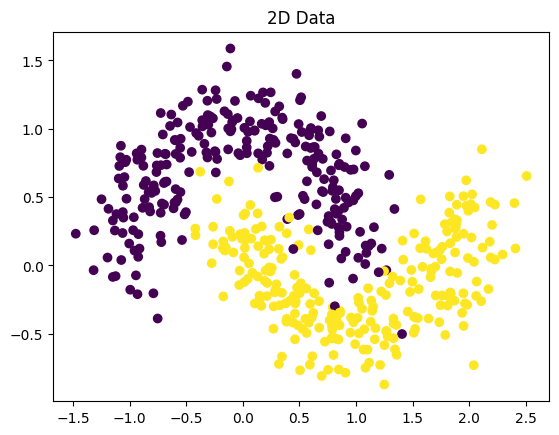

In [ ]:
# import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

# generate synthetic data in 2D
X, Y = make_moons(500, noise=0.2)

# plot the data
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('2D Data')
plt.show()

Can this data be correctly separable using the classifier below? Why? (3 marks)

model = nn.Sequential( \
    nn.Linear(n_input_dim, n_output), \
    nn.Sigmoid() \
    )
    
<span style="color:blue">
    answer: The given neural network model, composed of a single linear layer followed by a sigmoid activation function, may face challenges in correctly classifying the synthetic "make_moons" dataset. This dataset, characterized by crescent moon shapes, implies the presence of a non-linear decision boundary. The linear classifier's inherent limitation in creating only linear decision boundaries may compromise its effectiveness on this non-linear data. To enhance classification performance, a more sophisticated model with non-linear activation functions, potentially incorporating multiple layers, is advisable to adequately capture the nuanced patterns within the dataset and achieve accurate class separation.
</span>

## Question 2

**QUESTION 2 [40 marks]**

The COVID-19 pandemic continues to have a devastating effect on the health and well-being of the global population. A critical step in the fight against COVID-19 is effective screening of infected patients, with one of the key screening approaches being radiology examination using chest radiography. As a deep learning engineer, you are tasked to classify a dataset of X-ray images as either "normal", "covid" or "viral pneumonia". Use the chest X-ray dataset publicly available at https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset to answer the following questions.


a) Create and train a ConvNet corresponding to the following architecture in Fig. 1 (with modifications of the input and final layers). Please include **(10 marks)**:

    1) The dataloader to load the train and test datasets.

    2) The model definition (either using sequential method OR pytorch class method).

    3) Define your training loop.

    4) Output the mean accuracy for the whole testing dataset.

![pic](https://raw.githubusercontent.com/CUTe-EmbeddedAI/images/main/images/LeNet.png)
    
                                Fig. 1: A convolutional neural network

## 1. Upload Datasets from Kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                     title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                         DAIGT V2 Train Dataset                      29MB  2023-11-16 01:38:36           3128        253  1.0              
muhammadbinimran/housing-price-prediction-data          Housing Price Prediction Data              763KB  2023-11-21 17:56:32          13086        229  1.0              
thedrcat/daigt-external-train-dataset                   DAIGT External Train Dataset               435MB  2023-11-06 17:10:37            484         55  1.0              
thedrcat/daigt-proper-train-dataset                     DAIGT Proper Train Dataset                 119MB  2023-11-05 14:03:25           2403     

In [ ]:
!kaggle datasets download -d 'pranavraikokte/covid19-image-dataset'

covid19-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


## 2. Extract Dataset into Google Collab

In [ ]:
import zipfile

In [ ]:
dataset_zip = zipfile.ZipFile('covid19-image-dataset.zip', 'r')
dataset_zip.extractall()
dataset_zip.close()

## 3. Import Library Required

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## 4. Getting the Datasets

In [ ]:
# Define the transform without specifying mean and std
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

# Load a few samples from the dataset to compute mean and std
dataset = datasets.ImageFolder(root='/content/Covid19-dataset', transform=transform)

# Use the mean and std calculated by PyTorch during the first iteration
loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)
mean = 0.0
std = 0.0
for images, _ in loader:
    mean += images.mean([0, 2, 3])
    std += images.std([0, 2, 3])
mean /= len(loader)
std /= len(loader)

# Print the computed mean and std
print(f'Mean: {mean}')
print(f'Std: {std}')

# Use these values for transforms.Normalize
normalize_transform = transforms.Normalize(mean=mean, std=std)


Mean: tensor([0.4949, 0.4950, 0.4953])
Std: tensor([0.2597, 0.2597, 0.2597])


In [ ]:
transform = transforms.Compose(
    [transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize(mean=mean, std=std)
     ]
)


train_dir = '/content/Covid19-dataset/train' # define path of train dataset from kaggle
test_dir = '/content/Covid19-dataset/test'  # define path of test dataset from kaggle

train_data = datasets.ImageFolder(root=train_dir,
                                  transform = transform)
test_data = datasets.ImageFolder(root=test_dir,
                                  transform = transform)


In [ ]:
class_names = train_data.classes
class_names

['Covid', 'Normal', 'Viral Pneumonia']

## 5. Dataloader for Train and Test

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,batch_size=4, shuffle=True)

test_dataloader = DataLoader(test_data,batch_size=4, shuffle=False)

In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([4, 3, 32, 32]), torch.Size([4]))

## 6. Check and Set Device for PyTorch

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## 7. Build ConvNet Model

In [ ]:
class MidtermModel(nn.Module):
    def __init__(self):
        super(MidtermModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)

        # Fully connected layers (assuming spatial dimensions after pooling)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 3)  # Adjusted for 3 classes

        # Flatten function
        self.flatten = nn.Flatten()

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Convolutional Layer 1
        x = self.conv1(x)

        # ReLU activation function
        x = self.relu(x)

        # Max Pooling Layer
        x = self.pool(x)

        # Convolutional Layer 2
        x = self.conv2(x)

        # ReLU activation function
        x = self.relu(x)

        # Max Pooling Layer
        x = self.pool(x)

        # Flatten the input for fully connected layers
        x = self.flatten(x)

        # Fully Connected Layer 1
        x = self.fc1(x)

        # ReLU activation function
        x = self.relu(x)

        # Fully Connected Layer 2 (Output Layer)
        out = self.fc2(x)

        return out

# Create an instance of the model
torch.manual_seed(42)
myModel = MidtermModel().to(device)
myModel


MidtermModel(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=3, bias=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (relu): ReLU()
)

## 8. Setup Loss and Optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=myModel.parameters(),
                             lr=0.001, momentum = 0.09)

## 9. Setup Training Loop

In [ ]:
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history



In [ ]:
# Train the model for 10 epochs

num_epochs = 10
myModel, history = train_and_validate(myModel, loss_fn, optimizer, train_dataloader, test_dataloader, num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 1.0984, Accuracy: 27.8884%, 
		Validation : Loss : 1.0820, Accuracy: 30.3030%, Time: 18.0248s
Epoch: 2/10
Epoch : 001, Training: Loss: 1.0788, Accuracy: 33.0677%, 
		Validation : Loss : 1.0688, Accuracy: 54.5455%, Time: 9.1832s
Epoch: 3/10
Epoch : 002, Training: Loss: 1.0604, Accuracy: 65.7371%, 
		Validation : Loss : 1.0561, Accuracy: 62.1212%, Time: 10.0299s
Epoch: 4/10
Epoch : 003, Training: Loss: 1.0418, Accuracy: 67.3307%, 
		Validation : Loss : 1.0420, Accuracy: 57.5758%, Time: 9.8737s
Epoch: 5/10
Epoch : 004, Training: Loss: 1.0208, Accuracy: 62.9482%, 
		Validation : Loss : 1.0247, Accuracy: 60.6061%, Time: 10.0140s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.9962, Accuracy: 64.1434%, 
		Validation : Loss : 1.0022, Accuracy: 62.1212%, Time: 9.0520s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.9637, Accuracy: 64.5418%, 
		Validation : Loss : 0.9717, Accuracy: 66.6667%, Time: 10.0650s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.9227, Accuracy:

## 10. Output Mean Accuracy for Dataset

In [ ]:
myModel.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = myModel(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = (torch.tensor(all_preds) == torch.tensor(all_labels)).float().mean().item()
print(f"Mean Accuracy on Test Dataset: {accuracy}")

Mean Accuracy on Test Dataset: 0.7272727489471436


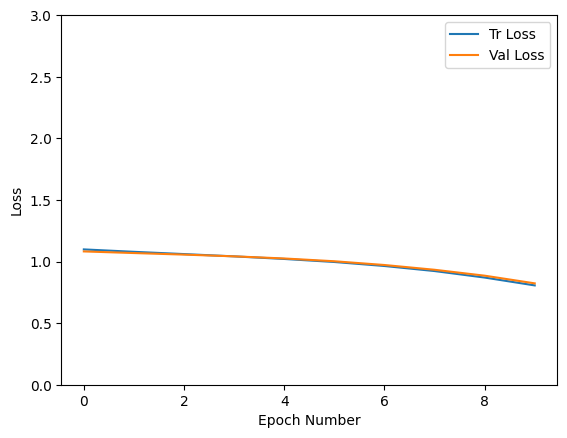

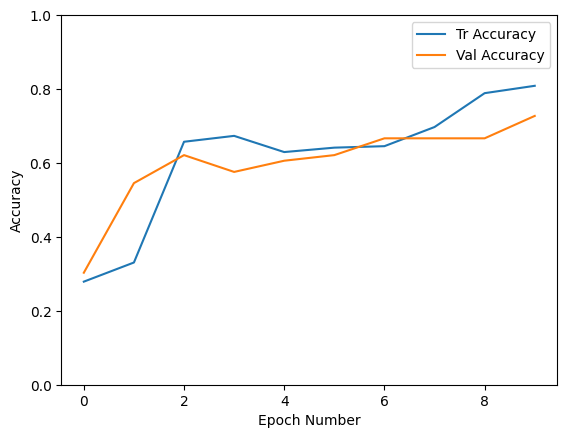

In [ ]:
#Analyze the loss curve

def plot_loss(history):
  history = np.array(history)
  plt.plot(history[:,0:2])
  plt.legend(['Tr Loss', 'Val Loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.ylim(0,3)
  plt.show()

plot_loss(history)

def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  # plt.savefig('cifar10_accuracy_curve.png')
  plt.show()

plot_accuracy(history)


b) Based on Question 2 a), answer the following questions:
    
    i) Is the model overfitting? Why? (4 marks)
   <font color='blue'>NO.Because the results show that the model is neither overfitting nor underfitting, it indicates a balanced state where the model has found a suitable equilibrium between complexity and generalization to the dataset. In this scenario, the model exhibits strong performance on both the training and testing sets, suggesting that it has effectively learned the underlying patterns within the data without fitting too closely or too loosely. The model's ability to generalize well to unseen data implies that it captures essential features without memorizing specific training examples. This balanced performance signifies a robust and well-tuned model, demonstrating its capability to handle new instances appropriately while maintaining a good fit to the training data.</font>
    
    ii) Propose two methods to reduce the effect of overfitting. (4 marks)
   <font color='blue'>Two methods that I propose are: (1) Batch Normalization (2) Dropout</font>
   
    iii) Implement the two proposed methods in Q2 b) ii) in the next cell and show that the overfitting has been reduced. (8 marks)

In [ ]:
class MidtermModel(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super(MidtermModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.batchnorm1 = nn.BatchNorm2d(6)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.batchnorm2 = nn.BatchNorm2d(16)

        # Fully connected layers (assuming spatial dimensions after pooling)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 3)  # Adjusted for 3 classes

        # Dropout layer
        self.dropout = nn.Dropout(p=dropout_prob)

        # Flatten function
        self.flatten = nn.Flatten()

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Convolutional Layer 1
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        x = self.pool(x)

        # Convolutional Layer 2
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.pool(x)

        # Flatten the input for fully connected layers
        x = self.flatten(x)

        # Fully Connected Layer 1
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)

        # Fully Connected Layer 2 (Output Layer)
        out = self.fc2(x)

        return out

# Create an instance of the model with dropout probability of 0.5
torch.manual_seed(42)
myModel = MidtermModel(dropout_prob=0.5).to(device)
myModel

MidtermModel(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (batchnorm1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (batchnorm2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=3, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (relu): ReLU()
)

c) Replace your defined ConvNet in b) with a pre-trained model. Then, proceed with a transfer learning and finetune the model for the COVID-19 dataset. **(10 marks)**

Epoch 1/10, Train Loss: 1.2623, Test Loss: 1.3976, Train Accuracy: 0.6255, Test Accuracy: 0.3485
Epoch 2/10, Train Loss: 1.1492, Test Loss: 0.9340, Train Accuracy: 0.6335, Test Accuracy: 0.7273
Epoch 3/10, Train Loss: 1.0404, Test Loss: 0.7599, Train Accuracy: 0.6614, Test Accuracy: 0.6515
Epoch 4/10, Train Loss: 0.9029, Test Loss: 0.7135, Train Accuracy: 0.7131, Test Accuracy: 0.6818
Epoch 5/10, Train Loss: 0.6639, Test Loss: 0.9617, Train Accuracy: 0.7649, Test Accuracy: 0.5000
Epoch 6/10, Train Loss: 0.9569, Test Loss: 0.7037, Train Accuracy: 0.6853, Test Accuracy: 0.6515
Epoch 7/10, Train Loss: 0.8777, Test Loss: 0.5992, Train Accuracy: 0.7171, Test Accuracy: 0.6970
Epoch 8/10, Train Loss: 0.6649, Test Loss: 0.6723, Train Accuracy: 0.7849, Test Accuracy: 0.6364
Epoch 9/10, Train Loss: 0.6815, Test Loss: 0.7517, Train Accuracy: 0.7928, Test Accuracy: 0.5909
Epoch 10/10, Train Loss: 0.7715, Test Loss: 0.6366, Train Accuracy: 0.7649, Test Accuracy: 0.8182


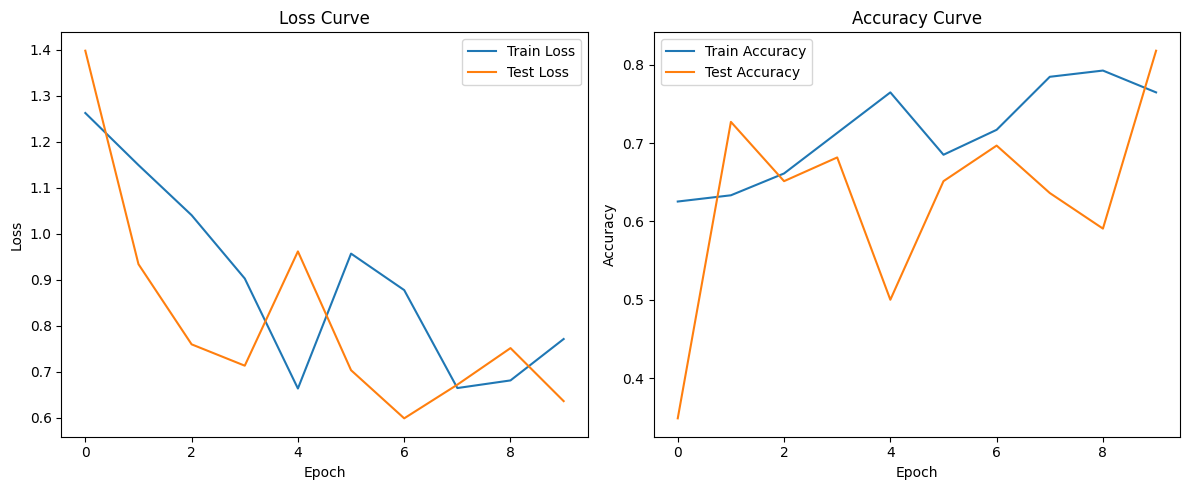

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

# Assuming your data is stored in the train_dir and test_dir directories
train_dir = '/content/Covid19-dataset/train'
test_dir = '/content/Covid19-dataset/test'

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)])

# Load the COVID-19 dataset
train_data = ImageFolder(root=train_dir, transform=transform)
test_data = ImageFolder(root=test_dir, transform=transform)

# Create data loaders
batch_size = 4
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Load a pre-trained ResNet18 model
pretrained_resnet18 = models.resnet18(pretrained=True)

# Modify the output layer to match the number of classes in your COVID-19 dataset
num_classes = len(train_data.classes)
pretrained_resnet18.fc = nn.Linear(pretrained_resnet18.fc.in_features, num_classes)

# Move the model to the GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
pretrained_resnet18 = pretrained_resnet18.to(device)

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=pretrained_resnet18.parameters(),
                             lr=0.001, momentum=0.9)

# Train the model (fine-tuning)
num_epochs = 10
train_losses, test_losses, train_accuracies, test_accuracies = [], [], [], []

for epoch in range(num_epochs):
    pretrained_resnet18.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = pretrained_resnet18(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    train_losses.append(running_loss / len(train_dataloader))
    train_accuracies.append(correct_train / total_train)

    # Validate the model
    pretrained_resnet18.eval()
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = pretrained_resnet18(inputs)
            loss = loss_fn(outputs, labels)
            test_loss += loss.item()

            _, predicted_test = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted_test == labels).sum().item()

    test_losses.append(test_loss / len(test_dataloader))
    test_accuracies.append(correct_test / total_test)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}')

# Save the fine-tuned model
torch.save(pretrained_resnet18.state_dict(), 'fine_tuned_resnet18.pth')

# Plotting the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')

plt.tight_layout()
plt.savefig('loss_accuracy_curves.png')
plt.show()


d) Do you see any accuracy improvement? Whether it is a "yes" or "no", discuss the possible reasons contributing to the accuracy improvement/ unimprovement. **(4 marks)**

<font color='blue'>
    Your answer here : Yes, It can be observed that using a custom ConvNet is preferable for a simple model or a small dataset because employing pretrained models may lead to overfitting due to their inherent complexity. Another point to note is that accuracy improvement can occur when utilizing a custom ConvNet. This is because we have the flexibility to adjust the learning rate, a factor that can significantly impact the model's performance. In contrast, pretrained models come with fixed learning rates.

## Question 3

**QUESTION 3** **[15 marks]**

In a machine vision project, you decide to design a door access control system based on hand gestures. Only those who shows the correct hand gesture will be granted the access. There are three gestures that are recognized as correct access passcode which are "shaka", "peace" and "thumbs up", as depicted in Fig. 2.

![pic](https://simplyorganizedhi.com/media/catalog/product/1/6/169500.jpg)

                                Fig. 2 Shaka,peace, and thumbs up


Using the end-to-end object detection pipeline that you have learned, develop your own hand gesture detector so that it can be incorporate to a door access control system.

Deliverable for this question is the model .pt file. Change the name to <your_name>.pt file (e.g. hasan.pt).

- Marks are given based on the performance of the model when tested using my machine and camera at my office. This question aims to evaluate the model's robustness and generalization capabilities.